In [1]:
from pressure_over_inverse_area import plot_pressure_over_inverse_area, pressure_over_inverse_area
from min_sqrs import plot_regression_data, min_sqrs, perform_regression

In [2]:
delta_t = 5

In [3]:
impulse_files = [
    "../Out-N500-L0.03-ITER500000-POST50-wallEvents-w-0.09.txt",
    "../Out-N500-L0.05-ITER500000-POST50-wallEvents-w-0.09.txt",
    "../Out-N500-L0.07-ITER500000-POST50-wallEvents-w-0.09.txt",
    "../Out-N500-L0.09-ITER500000-POST50-wallEvents-w-0.09.txt"
]
    
Ls = [
    0.03,
    0.05,
    0.07,
    0.09
]
    
stationary_ts = [
    30,
    50,
    70,
    80
]

In [4]:
dfs = pressure_over_inverse_area(impulse_files, Ls, delta_t, stationary_ts)

0.03 48
0.05 60
0.07 73
0.09 89


           Pressure
Area               
61.728395  1.312667            Pressure
Area               
61.728395  0.036643


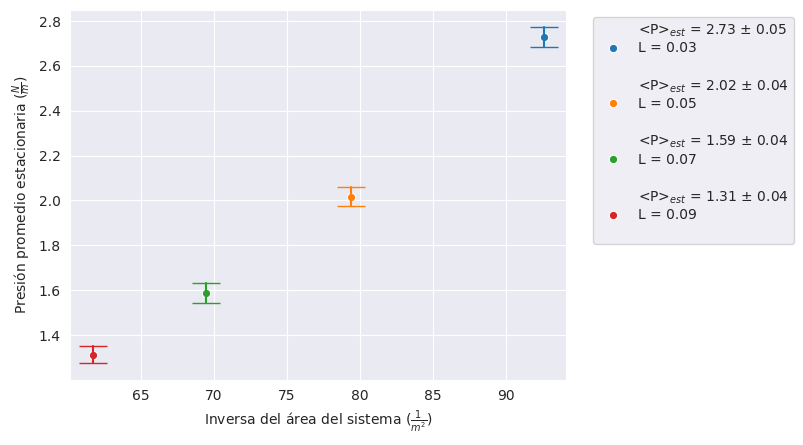

In [5]:
plot_pressure_over_inverse_area(dfs, Ls)

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(data={}, columns=["Pressure", "Area"])
for l_df in dfs:
    df = pd.concat([df, l_df])

In [8]:
X= df.groupby(["Area"]).mean().index.to_numpy()
X

array([61.72839506, 69.44444444, 79.36507937, 92.59259259])

In [9]:
Y = df.groupby(["Area"]).mean().values
Y

array([[1.31266699],
       [1.58666255],
       [2.01741413],
       [2.72894136]])

In [10]:
K = min_sqrs(X, [lambda x : x], Y)
K

array([[0.02569676]])

In [11]:
k = K[0,0]
k

0.025696761640170835

In [12]:
fitted_f = lambda x : k*x

In [13]:
import numpy as np

In [14]:
vec_fitted_f = np.vectorize(fitted_f)

In [15]:
fit_X = np.linspace(60, 95, 10)
fit_Y = vec_fitted_f(fit_X)

In [16]:
import matplotlib.pyplot as plt

In [17]:
c = 0.025

           Pressure
Area               
61.728395  1.312667            Pressure
Area               
61.728395  0.036643


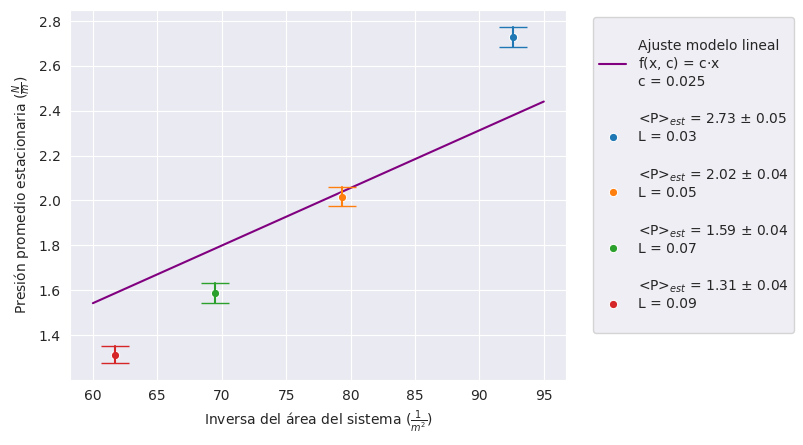

In [18]:
plt.plot(fit_X, fit_Y, label="\nAjuste modelo lineal\nf(x, c) = c$\\cdot$x\nc = {:.2g}\n".format(c), color="purple")
plot_pressure_over_inverse_area(dfs, Ls)

In [19]:
k_values = np.arange(0, 5, 0.001)
k_values

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.997e+00, 4.998e+00,
       4.999e+00])

In [20]:
F, reg_dat = perform_regression(X, k_values, lambda x, c : c*x, Y)
F

array([1.54320988, 1.73611111, 1.98412698, 2.31481481])

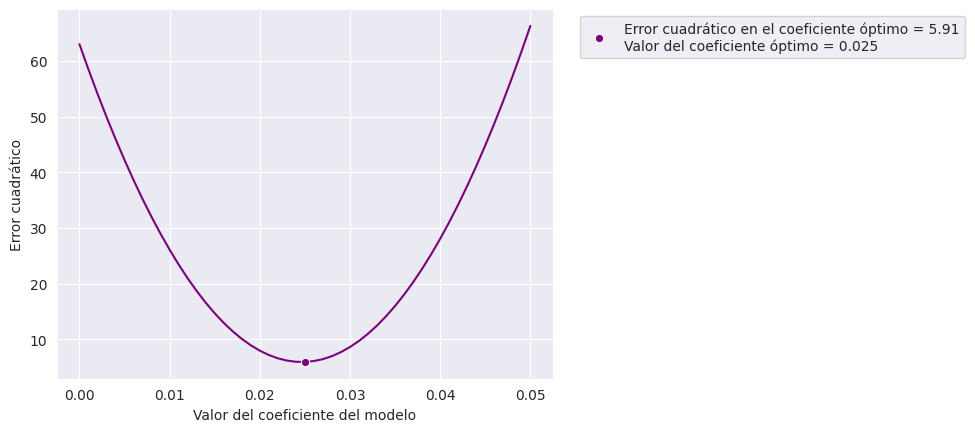

In [21]:
plot_regression_data(reg_dat, "pressure_over_inverse_area_constant.png")